# Predict Covid-19 using Polynomial Regression and Linear Regression

In [1]:
#import all packages/libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [2]:
df = pd.read_csv('data/covid_indonesia_2.csv')
df.head()

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140


# Data Preparation

In [3]:
df.describe()

,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
count,137.000000,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.00000
mean,15128.343066,3.800636e+06,212836.240876,16188.065693,3.467221e+06,621.664234,120578.20438
std,16758.477055,6.121355e+05,201927.468029,15064.380154,7.427454e+05,614.988956,28539.47019
min,244.000000,2.203108e+06,9018.000000,451.000000,1.890287e+06,11.000000,58995.00000
25%,1053.000000,3.532567e+06,22541.000000,1946.000000,2.907920e+06,50.000000,100636.00000
50%,5436.000000,4.140634e+06,138630.000000,12474.000000,3.864848e+06,493.000000,137156.00000
75%,29745.000000,4.228552e+06,380797.000000,29794.000000,4.063295e+06,1128.000000,142716.00000
max,56757.000000,4.250855e+06,574135.000000,48832.000000,4.098178e+06,2069.000000,143659.00000


In [4]:
df.dtypes

Tanggal            object
Kasus_harian        int64
Total_kasus         int64
Kasus_aktif         int64
Sembuh_baru         int64
Sembuh              int64
Meninggal_baru      int64
Meninggal_Dunia     int64
dtype: object

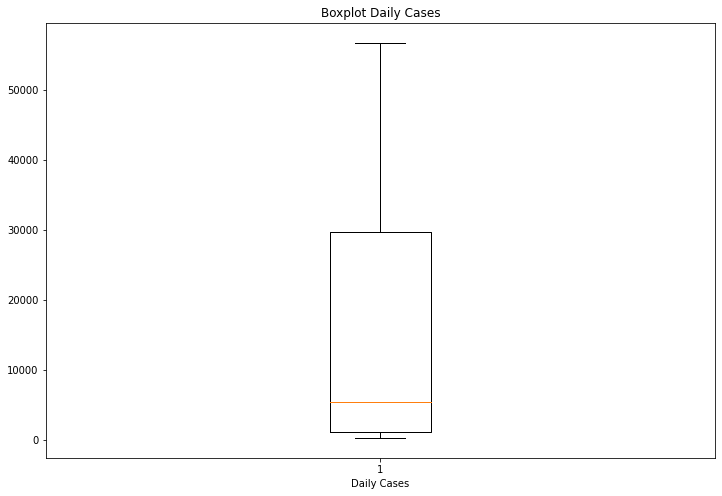

In [25]:
# Analyze outliers

fig, ax = plt.subplots(figsize=(12,8))

ax.boxplot(df['Kasus_harian'])
ax.set_xlabel('Daily Cases')
plt.title('Boxplot Daily Cases')
plt.show()

Because what I will use is the date column as the time-series and the daily case as our input, so consider this as two columns. In the daily case details, it can be seen that the max and min values are very far away with 50% of the data being in the 5000's. Far from the average in the 15000s. So in this case i'm using logarithmic normalization and change the date to numeric


In [6]:
df['case_norm'] = np.log(df['Kasus_harian'])
df

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,case_norm
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416
...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322


In [7]:
default_date = pd.to_datetime(df['Tanggal'].loc[0])
print(f'Value of default_date adalah : {default_date}')

Value of default_date adalah : 2021-07-01 00:00:00


In [8]:
df['days'] = df['Tanggal'].apply(lambda x: pd.Timedelta(pd.to_datetime(x) - default_date).days)
df

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,case_norm,days
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049,0
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292,1
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848,2
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185,3
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416,4
...,...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786,132
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346,133
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961,134
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322,135


In [9]:
# Make new DataFrame

new_df = df[['case_norm', 'days']]
new_df

,case_norm,days
0,10.120049,0
1,10.159292,1
2,10.236848,2
3,10.212185,3
4,10.300416,4
...,...,...
132,6.173786,132
133,6.075346,133
134,5.988961,134
135,5.883322,135


# DATA PROCESSING

In [10]:
#Building model
X = np.array(df['days']).reshape((-1,1))
y = np.array(df['case_norm']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


print(f'Dimension of X_train : {len(X_train)}')
print(f'Dimension of y_train : {len(y_train)}')
print(f'Dimension of X_test : {len(X_test)}')
print(f'Dimension of y_test : {len(y_test)}')




Dimension of X_train : 109
Dimension of y_train : 109
Dimension of X_test : 28
Dimension of y_test : 28


# Modelling

In [11]:
# Polynomial Regression
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

# Linear Regression
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

# Predict and Evaluate Model

In [12]:
X_tests = sorted(X_test) 
poly_x_test = poly_reg.fit_transform(X_test)

y_pred = model.predict(poly_x_test)

y_pred

array([ 9.26617997,  6.89474381, 10.08319808,  8.87498489,  8.29068795,
        9.84674833, 10.1812637 ,  9.5270456 ,  8.9549679 ,  7.61724076,
        8.71240289,  7.98251657,  6.94443627,  9.41655404, 11.02807988,
        6.48935621,  9.98317047, 10.14879316,  9.07330742,  8.46198991,
        5.58158278,  7.52374182, 10.27736733,  8.20372898,  9.9153954 ,
        6.7947049 ,  9.67131569, 10.46368862])

In [13]:
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
R2 score is 0.9327642312719866


# PREDICT NEW DATA

In [14]:
# Make new Data input
predict_date = np.arange(137,167).reshape(-1,1)
predict_date

array([[137],
       [138],
       [139],
       [140],
       [141],
       [142],
       [143],
       [144],
       [145],
       [146],
       [147],
       [148],
       [149],
       [150],
       [151],
       [152],
       [153],
       [154],
       [155],
       [156],
       [157],
       [158],
       [159],
       [160],
       [161],
       [162],
       [163],
       [164],
       [165],
       [166]])

In [15]:


poly_x_test_new = poly_reg.fit_transform(predict_date)
predict_cases = model.predict(poly_x_test_new)
predict_cases


array([5.4148475 , 5.35883307, 5.30260065, 5.24615023, 5.18948181,
       5.13259539, 5.07549097, 5.01816855, 4.96062814, 4.90286972,
       4.84489331, 4.78669889, 4.72828648, 4.66965607, 4.61080766,
       4.55174125, 4.49245684, 4.43295444, 4.37323403, 4.31329563,
       4.25313922, 4.19276482, 4.13217242, 4.07136202, 4.01033362,
       3.94908722, 3.88762283, 3.82594043, 3.76404004, 3.70192164])

5. Data Analysis
Pada kesempatan kali ini kita akan melakukan analysis. Pertama dengan membuat grafik 30 hari kedepan. lalu menganalisis grafik dan model kita.

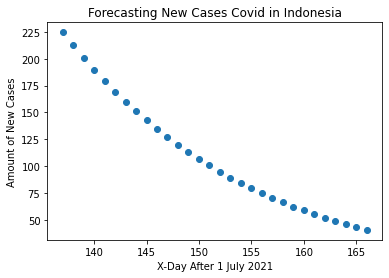

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
plt.title('Forecasting New Cases Covid in Indonesia')
plt.xlabel('X-Day After 1 July 2021')
plt.ylabel('Amount of New Cases')
predict_cases = np.exp(predict_cases)
ax.plot(predict_date, predict_cases, 'o')

we can see from the graph above that the cases of covid-19 in Indonesia will continue to decrease every day. After seeing this we must take action to better maintain this number and not negligent in carrying out health protocols 

# Comparison Using Polynomial Regression and Not Using it

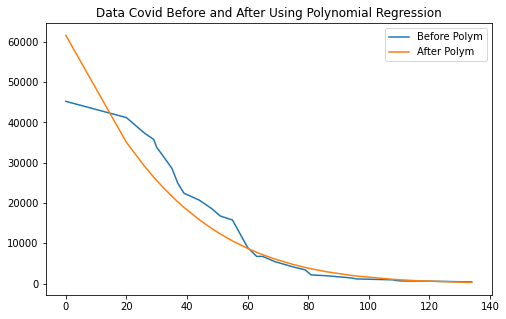

In [17]:
y_tests = sorted(y_test, reverse=True)
y_preds = sorted(y_pred, reverse=True)

fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Data Covid Before and After Using Polynomial Regression')
y_tests = np.exp(y_tests)
y_preds = np.exp(y_preds)
ax.plot(X_tests, y_tests)
ax.plot(X_tests, y_preds)
plt.legend(["Before Polym", "After Polym"], loc ="upper right")

plt.show()